In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#df_features = pd.read_csv('investor_features_n_embedding.csv')
df_features = pd.read_csv('normalized_sector_grouped_investors.csv')

In [11]:
#pd.options.display.float_format = '{:.10f}'.format
#selected_columns = pd.concat([df_features.iloc[:, 1], df_features.iloc[:, 27:753]], axis=1)
#selected_columns.to_csv('selected_columns.csv', index=False, float_format='%.10f')
#selected_columns = df_features.iloc[:, 27:753]
#selected_columns
#new_df = pd.DataFrame(selected_columns)
#new_df
#selected_columns.to_csv('selected_columns.csv', index=False)
df_features

,investor_uuid,Sales and Marketing,Gaming,Information Technology,Payments,Food and Beverage,Messaging and Telecommunications,Education,Clothing and Apparel,Events,...,Mobile,Real Estate,Administrative Services,Artificial Intelligence,Health Care,Internet Services,Design,Community and Lifestyle,Apps,Transportation
0,00011be5-d105-eaa0-69d6-6064e74916b2,0.000000,0.000000,0.000000,0.008130,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0003f244-79d0-6178-353e-33dabaf3b2c6,0.033784,0.071429,0.048649,0.065041,0.019512,0.095238,0.025157,0.04,0.066667,...,0.030457,0.093750,0.030769,0.021739,0.019417,0.055300,0.032864,0.123967,0.028674,0.037037
2,0005e438-8f64-d01c-822d-a2de10690fed,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,00061f14-f018-e086-b068-41759f55cf59,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.001536,0.000000,0.000000,0.000000,0.000000
4,00063118-3cfe-3c48-79d9-94eaf4cdca51,0.000000,0.000000,0.001802,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66874,fff9240a-22b8-ee94-6b86-fab33d60e60c,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
66875,fff9b47c-6fb5-05f7-8603-47ec57c49d6c,0.000000,0.000000,0.000000,0.008130,0.000000,0.000000,0.000000,0.00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
66876,fff9d7da-1a06-4e5b-8133-08271ea44e87,0.003378,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.002538,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
66877,fffdb72e-00d3-5a4f-3e92-44efc06f3e97,0.023649,0.000000,0.007207,0.008130,0.009756,0.009524,0.018868,0.00,0.000000,...,0.002538,0.010417,0.000000,0.007246,0.018204,0.009217,0.004695,0.016529,0.010753,0.013468


In [12]:
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
#selected_columns = df_features.iloc[:, 27:753]
selected_columns = df_features.iloc[:, 1:48]
na_counts = selected_columns.isna().sum().sum()
print(f"Total number of NA values: {na_counts}")
selected_columns_clean = selected_columns.dropna()
selected_columns_clean

Total number of NA values: 0


,Sales and Marketing,Gaming,Information Technology,Payments,Food and Beverage,Messaging and Telecommunications,Education,Clothing and Apparel,Events,Professional Services,...,Mobile,Real Estate,Administrative Services,Artificial Intelligence,Health Care,Internet Services,Design,Community and Lifestyle,Apps,Transportation
0,0.000000,0.000000,0.000000,0.008130,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.033784,0.071429,0.048649,0.065041,0.019512,0.095238,0.025157,0.04,0.066667,0.091503,...,0.030457,0.093750,0.030769,0.021739,0.019417,0.055300,0.032864,0.123967,0.028674,0.037037
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.001536,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.001802,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66874,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
66875,0.000000,0.000000,0.000000,0.008130,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
66876,0.003378,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,...,0.002538,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
66877,0.023649,0.000000,0.007207,0.008130,0.009756,0.009524,0.018868,0.00,0.000000,0.006536,...,0.002538,0.010417,0.000000,0.007246,0.018204,0.009217,0.004695,0.016529,0.010753,0.013468


/Users/wmalik/Documents/MSc/sartaj_zain_recommend/Gat2conv/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


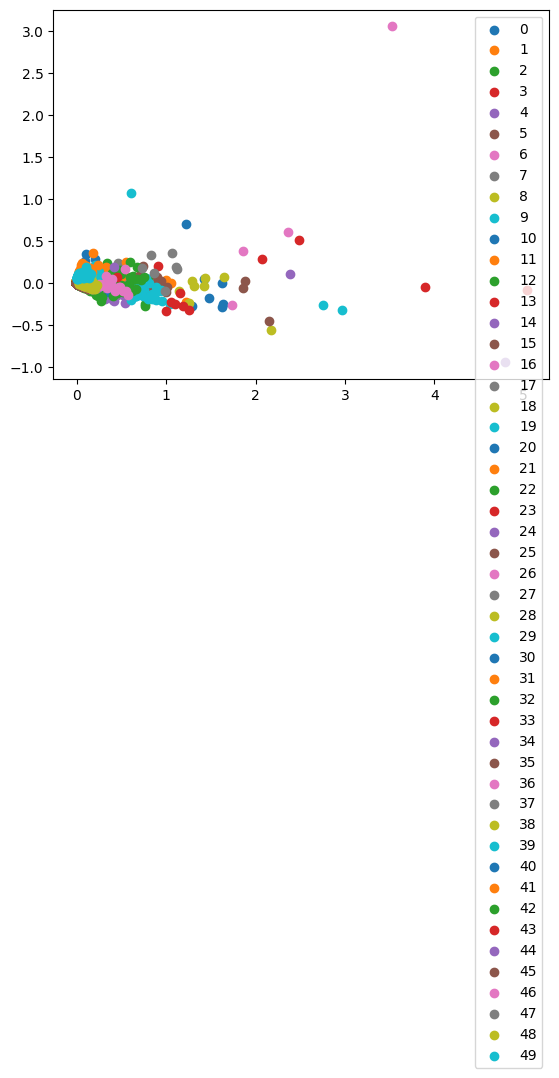

In [15]:
#df = selected_columns
model = KMeans(n_clusters=50)
model.fit(selected_columns_clean)
clusters = model.predict(selected_columns_clean)
cleaned_df = df_features.loc[selected_columns_clean.index].copy()
cleaned_df['Cluster'] = clusters
yhat = model.predict(selected_columns_clean)

dims = PCA(n_components=2).fit_transform(selected_columns_clean)
dims = pd.DataFrame(dims, columns=['PC1', 'PC2'])

fig, ax = plt.subplots(1, 1)
for cluster in np.unique(clusters):
    ix = clusters == cluster
    ax.scatter(x=dims.loc[ix, 'PC1'], y=dims.loc[ix, 'PC2'], label=cluster)
ax.legend()
plt.show()

In [16]:
#output = cleaned_df[['uuid', 'Cluster']]
output = cleaned_df
output.to_csv('uuid_clusters_limited.csv', index=False)

/Users/wmalik/Documents/MSc/sartaj_zain_recommend/Gat2conv/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/wmalik/Documents/MSc/sartaj_zain_recommend/Gat2conv/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/wmalik/Documents/MSc/sartaj_zain_recommend/Gat2conv/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/wmalik/Documents/MSc/

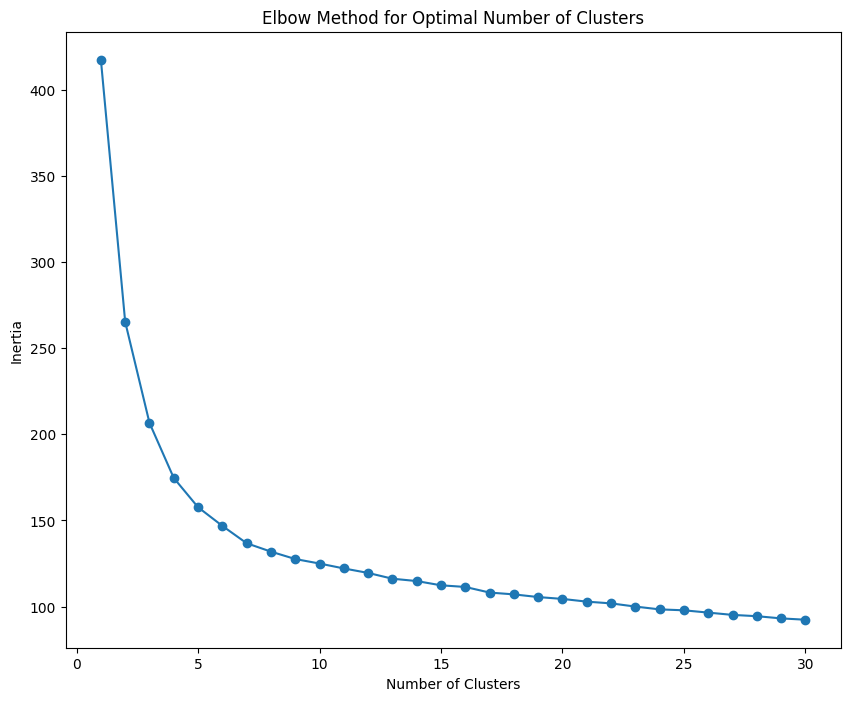

In [6]:
# Calculate inertia for a range of cluster numbers
inertia_values = []
cluster_range = range(1, 31)  # You can adjust the range as needed

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df_clean[category_columns])
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values to find the "elbow"
plt.figure(figsize=(10, 8))
plt.plot(cluster_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [13]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
df_features = pd.read_csv('normalized_sector_grouped_investors.csv')
category_columns = df_features.columns[1:]
df_clean = df_features.dropna(subset=category_columns)
n_clusters = 5  # You can adjust the number of clusters as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_clean['Cluster'] = kmeans.fit_predict(df_clean[category_columns])
df_clean.to_csv('df_features_with_clusters.csv', index=False)

/Users/wmalik/Documents/MSc/sartaj_zain_recommend/Gat2conv/venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


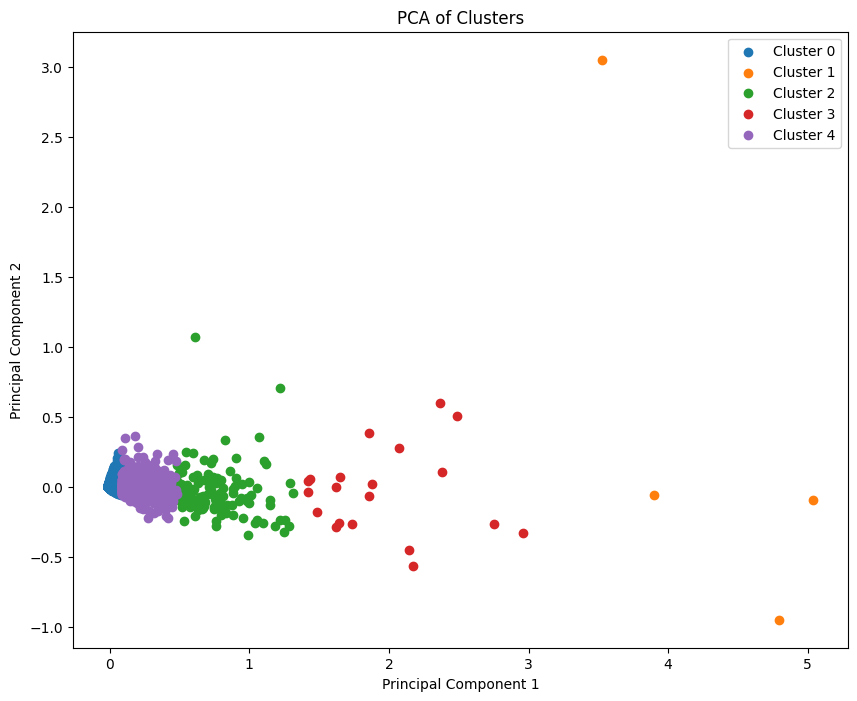

In [14]:
pca = PCA(n_components=2)
pca_dims = pca.fit_transform(df_clean[category_columns])
pca_dims = pd.DataFrame(pca_dims, columns=['PC1', 'PC2'])

# Plot the clusters
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for cluster in np.unique(df_clean['Cluster']):
    ix = df_clean['Cluster'] == cluster
    ax.scatter(x=pca_dims.loc[ix, 'PC1'], y=pca_dims.loc[ix, 'PC2'], label=f'Cluster {cluster}')
ax.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Clusters')
plt.show()

In [15]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
# Calculate evaluation metrics
silhouette_avg = silhouette_score(df_clean[category_columns], df_clean['Cluster'])
davies_bouldin = davies_bouldin_score(df_clean[category_columns], df_clean['Cluster'])
inertia = kmeans.inertia_

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin}')
print(f'Inertia: {inertia}')

Silhouette Score: 0.8760954156142569
Davies-Bouldin Index: 1.0988778943480946
Inertia: 157.62246411196764
